# EX.1 

## 1.

In [ ]:
scottish.lake <- read.table('data.txt', header=T)
scottish.lake

In [ ]:
max_area <- max(scottish.lake['Area']) 
min_area <- min(scottish.lake['Area'])
max_volume <- max(scottish.lake['Volume']) 
min_volume <- min(scottish.lake['Volume']) 

In [ ]:
ordered_dataframe_byArea <- scottish.lake[order(scottish.lake$Area, decreasing = T),][1,]

In [ ]:
sprintf('Lake with the largest area: %s', ordered_dataframe_byArea[1,'Loch'])
sprintf('Lake with the smallest area: %s', tail(ordered_dataframe_byArea['Loch'], n=1))

In [ ]:
ordered_dataframe_byVolume <- scottish.lake[order(scottish.lake$Volume, decreasing = T),]

In [ ]:
sprintf('Lake with the largest Volume: %s', ordered_dataframe_byVolume[1,'Volume'])
#works also with:
#sprintf('Lake with the largest volume: %s', scottish.lake[order(scottish.lake$Volume, decreasing = T),][1,'Volume'])
sprintf('Lake with the smallest Volume: %s', tail(ordered_dataframe_byVolume['Volume'], n=1))


 ## 2. 


In [ ]:
ordered_lake_byArea <- scottish.lake[order(scottish.lake$Area, decreasing = T),]
ordered_lake_byArea

In [ ]:
cat('the two largest lake by area are:', ordered_lake_byArea[1,'Loch'], 'and', ordered_lake_byArea[2,'Loch'])

## 3.

In [ ]:
Scottish_lake_area <- sum(ordered_lake_byArea$Area)
Scottish_lake_area

# Ex. 2

## 1.

## library

In [1]:
install.packages('tidyverse')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(rvest, warn.conflicts = F)
library(tidyverse)
#library(magrittr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [8]:
men100m_html <- read_html ( "https://www.alltime-athletics.com/m_100ok.htm" )
men100m_html |> html_nodes( xpath = " // pre " ) |> html_text() -> men100m_list
men100m_tbl <- read_fwf( men100m_list )

Rows: 4025 Columns: 9
── Column specification ────────────────────────────────────────────────────────

chr (8): X2, X3, X4, X5, X6, X7, X8, X9
dbl (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Rename the columns

In [9]:
men100m_tbl<-rename(men100m_tbl, N=X1, time=X2, penalty=X3, name=X4, nationality=X5, birth_date=X6, race_location=X8, race_date=X9)
men100m_tbl

X1,X2,X3,X4,X5,X6,X7,X8,X9
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,9.58,+0.9,Usain Bolt,JAM,21.08.86,1,Berlin,16.08.2009
2,9.63,+1.5,Usain Bolt,JAM,21.08.86,1,London,05.08.2012
3,9.69,±0.0,Usain Bolt,JAM,21.08.86,1,Beijing,16.08.2008
3,9.69,+2.0,Tyson Gay,USA,09.08.82,1,Shanghai,20.09.2009
3,9.69,-0.1,Yohan Blake,JAM,26.12.89,1,Lausanne,23.08.2012
6,9.71,+0.9,Tyson Gay,USA,09.08.82,2,Berlin,16.08.2009
7,9.72,+1.7,Usain Bolt,JAM,21.08.86,1rA,New York City,31.05.2008
7,9.72,+0.2,Asafa Powell,JAM,23.11.82,1rA,Lausanne,02.09.2008
9,9.74,+1.7,Asafa Powell,JAM,23.11.82,1h2,Rieti,09.09.2007


## Manipulation
manipulate the tibble to add a name of the columns and to convert the columns to the proper
forma

In [13]:
men100m_tbl <- men100m_tbl |>
            drop_na(time, race_date) |>
            mutate(N = as.integer(N)) |> 
            mutate(time = as.double(time)) |>
            mutate(penalty =as.double(penalty)) |>
            mutate(birth_date = as.Date(birth_date, format='%d.%m.%Y')) |>
            mutate(race_date = as.Date(race_date, format='%d.%m.%Y'))
men100m_tbl 

N,time,penalty,name,nationality,birth_date,X7,race_location,race_date
<int>,<dbl>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<date>
1,9.58,0.9,Usain Bolt,JAM,86-08-21,1,Berlin,2009-08-16
2,9.63,1.5,Usain Bolt,JAM,86-08-21,1,London,2012-08-05
3,9.69,NA,Usain Bolt,JAM,86-08-21,1,Beijing,2008-08-16
3,9.69,2.0,Tyson Gay,USA,82-08-09,1,Shanghai,2009-09-20
3,9.69,-0.1,Yohan Blake,JAM,89-12-26,1,Lausanne,2012-08-23
6,9.71,0.9,Tyson Gay,USA,82-08-09,2,Berlin,2009-08-16
7,9.72,1.7,Usain Bolt,JAM,86-08-21,1rA,New York City,2008-05-31
7,9.72,0.2,Asafa Powell,JAM,82-11-23,1rA,Lausanne,2008-09-02
9,9.74,1.7,Asafa Powell,JAM,82-11-23,1h2,Rieti,2007-09-09


## Plots

### 1. Evolution of the fastest time as a function of date of the races

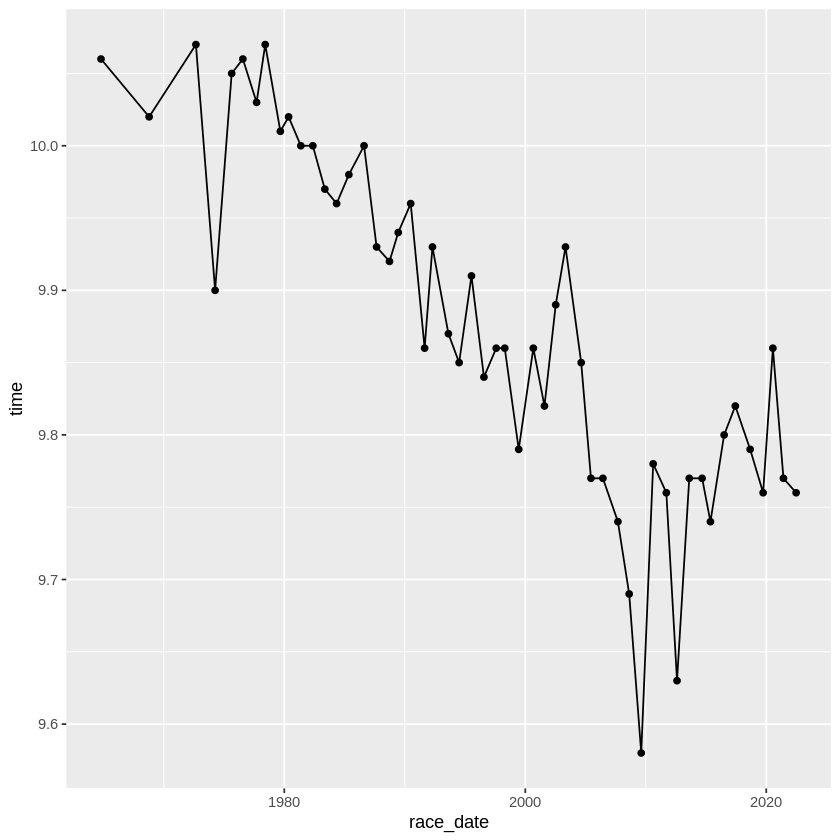

In [14]:
men100m_tbl |>
    group_by(format(race_date, format='%y')) |>
    slice_head(n=1) -> by_date

ggplot(by_date, aes(race_date, time)) + geom_point() + geom_line()

### 2. which country had the most fastest runners for each year? 

In [52]:
fastest_men <- men100m_tbl |> 
            group_by(race_date=format(race_date, format='%Y')) |>
            count(nationality) |> #inside each gropu counts the number of nationality 
            arrange(desc(n)) |> #arrange inside the group in a descending order
            slice_head(n=1) #inside each group takes only the first one
fastest_men

race_date,nationality,n
<chr>,<chr>,<int>
1964,USA,1
1968,USA,4
1972,USA,2
1974,S,1
1975,USA,4
1976,USA,3
1977,CUB,4
1978,USA,6
1979,USA,3


# Women

In [98]:
women100m_html <- read_html("http://www.alltime-athletics.com/w_100ok.htm")
women100m_html |> html_nodes( xpath = "//pre") |> html_text() -> women100m_list

women100m_tbl <- read_fwf(women100m_list, col_types = c('i', 'd', 'd', 'c', 'c', 'c', 'c', 'c', 'c'))
names(women100m_tbl) <- c('n', 'time', 'error', 'name', 'nationality', 'date_of_birth', 'arrival_position', 'race_location', 'date_of_race' ) 

women100m_tbl <- women100m_tbl |>
                drop_na(time, nationality, date_of_race) |>
                mutate(date_of_birth = as.Date(date_of_birth, format='%d.%m.%Y')) |>
                mutate(date_of_race = as.Date(date_of_race, format='%d.%m.%Y'))

women100m_tbl

n,time,error,name,nationality,date_of_birth,arrival_position,race_location,date_of_race
<int>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<date>
1,10.49,±0.0,Florence Griffith-Joyner,USA,59-12-21,1q1,Indianapolis,1988-07-16
2,10.54,+0.9,Elaine Thompson-Herah,JAM,92-06-28,1,Eugene,2021-08-21
3,10.60,+1.7,Shelly-Ann Fraser-Pryce,JAM,86-12-27,1rA,Lausanne,2021-08-26
4,10.61,+1.2,Florence Griffith-Joyner,USA,59-12-21,1,Indianapolis,1988-07-17
4,10.61,-0.6,Elaine Thompson-Herah,JAM,92-06-28,1,Tokyo,2021-07-31
6,10.62,+1.0,Florence Griffith-Joyner,USA,59-12-21,1q3,Seoul,1988-09-24
6,10.62,+0.4,Shelly-Ann Fraser-Pryce,JAM,86-12-27,1,Monaco,2022-08-10
8,10.63,+1.3,Shelly-Ann Fraser-Pryce,JAM,86-12-27,1rA,Kingston,2021-06-05
9,10.64,+1.2,Carmelita Jeter,USA,79-11-24,1,Shanghai,2009-09-20


# 1. Evolution of the fastest time as a function of the year

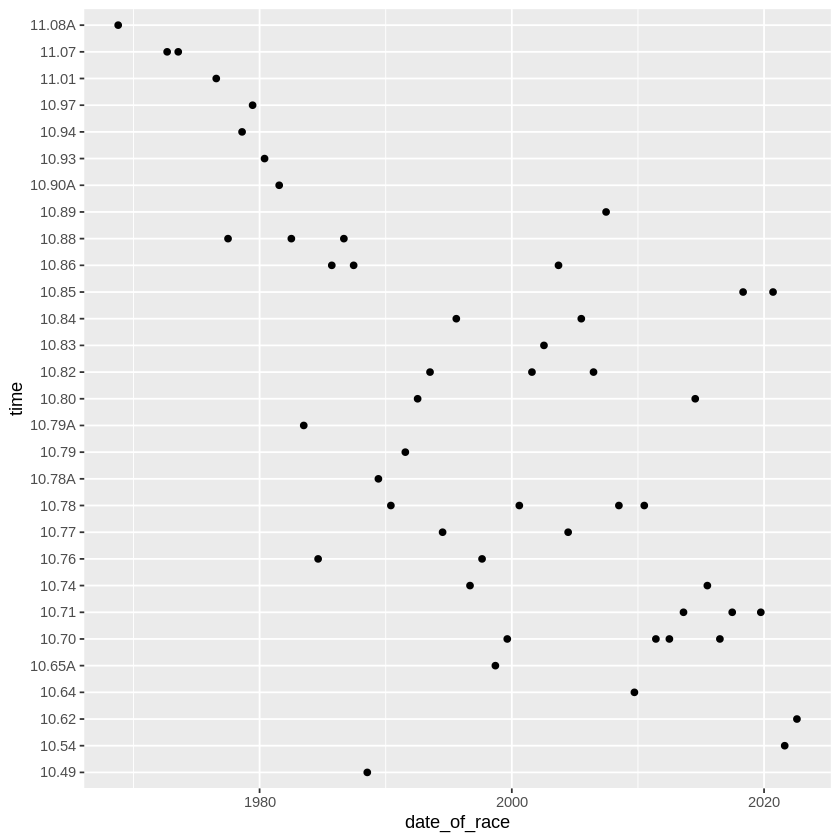

In [102]:
by_date_women <- women100m_tbl |>
                 group_by(format(date_of_race, format='%Y')) |>
                 slice_head(n=1)

ggplot(by_date_women, aes(date_of_race, time)) + geom_point()

# Fastest runner each year

In [109]:
fastet_country_women <- women100m_tbl |>
                        group_by(date_of_race=format(date_of_race, format='%Y')) |>
                        count(nationality) |>
                        arrange(desc(n)) |>
                        slice_head(n=2)
fastet_country_women

date_of_race,nationality,n
<chr>,<chr>,<int>
1968,USA,1
1972,GDR,1
1973,GDR,4
1976,FRG,7
1976,USA,1
1977,GDR,3
1977,FRG,1
1978,GDR,3
1979,USA,8
